# Nearest Neigbhor

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

import Data_vorbereitung as DV 
DV=DV.Data_preparation()


### Load the Dataset 

In [25]:

df=DV.load_csv_to_df("ricsData_big_v5.csv")
train_features,test_features,train_labels,test_labels=DV.split_data(df,0.7)



training set size: 564 samples 
test set size: 241 samples


In [26]:
train_features.head(3)


,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,innere_Konturen
338,0.310512,1.0,0.374462,26,4,1,0.154126
622,0.688679,1.0,0.865854,34,6,1,0.156445
716,0.209440,1.0,0.375610,3,5,0,0.055015


In [27]:
train_labels.head(3)

,Label
338,1
622,2
716,2


In [28]:
train_features.describe()

,Rel_BreitGross,RelSpitze_oben,RelSpitze_unten,Anzahl_Linie,Anzahl_Ecken,Anzahl_Kreis,innere_Konturen
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.515563,0.700818,0.687847,11.409574,9.147163,0.242908,0.133536
std,0.220519,0.313193,0.262555,11.145923,13.000122,0.429221,0.133076
min,0.164521,0.000000,0.067350,0.000000,0.000000,0.000000,0.000827
25%,0.338120,0.548309,0.478162,3.000000,3.000000,0.000000,0.050633
50%,0.471548,0.805436,0.690428,8.000000,7.000000,0.000000,0.086523
75%,0.667487,0.978952,0.949705,15.000000,12.000000,0.000000,0.165526
max,1.000000,1.000000,1.000000,70.000000,200.000000,1.000000,0.803512


### Normalize the Dataset 


In [34]:
scaler= Normalizer().fit(train_features) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(train_features) # the scaler is applied to the training set
normalized_x_test= scaler.transform(test_features) # the scaler is applied to the test set
print('x train before Normalization')
print(train_features[0:1])
print('\nx train after Normalization')
print(normalized_x_train[0:1])

x train before Normalization
     Rel_BreitGross  RelSpitze_oben  RelSpitze_unten  Anzahl_Linie  \
338        0.310512             1.0         0.374462            26   

     Anzahl_Ecken  Anzahl_Kreis  innere_Konturen  
338             4             1         0.154126  

x train after Normalization
[[0.01178465 0.03795236 0.01421172 0.9867614  0.15180945 0.03795236
  0.00584944]]


### Plot the features of the Dataset in an Scatterplot 

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

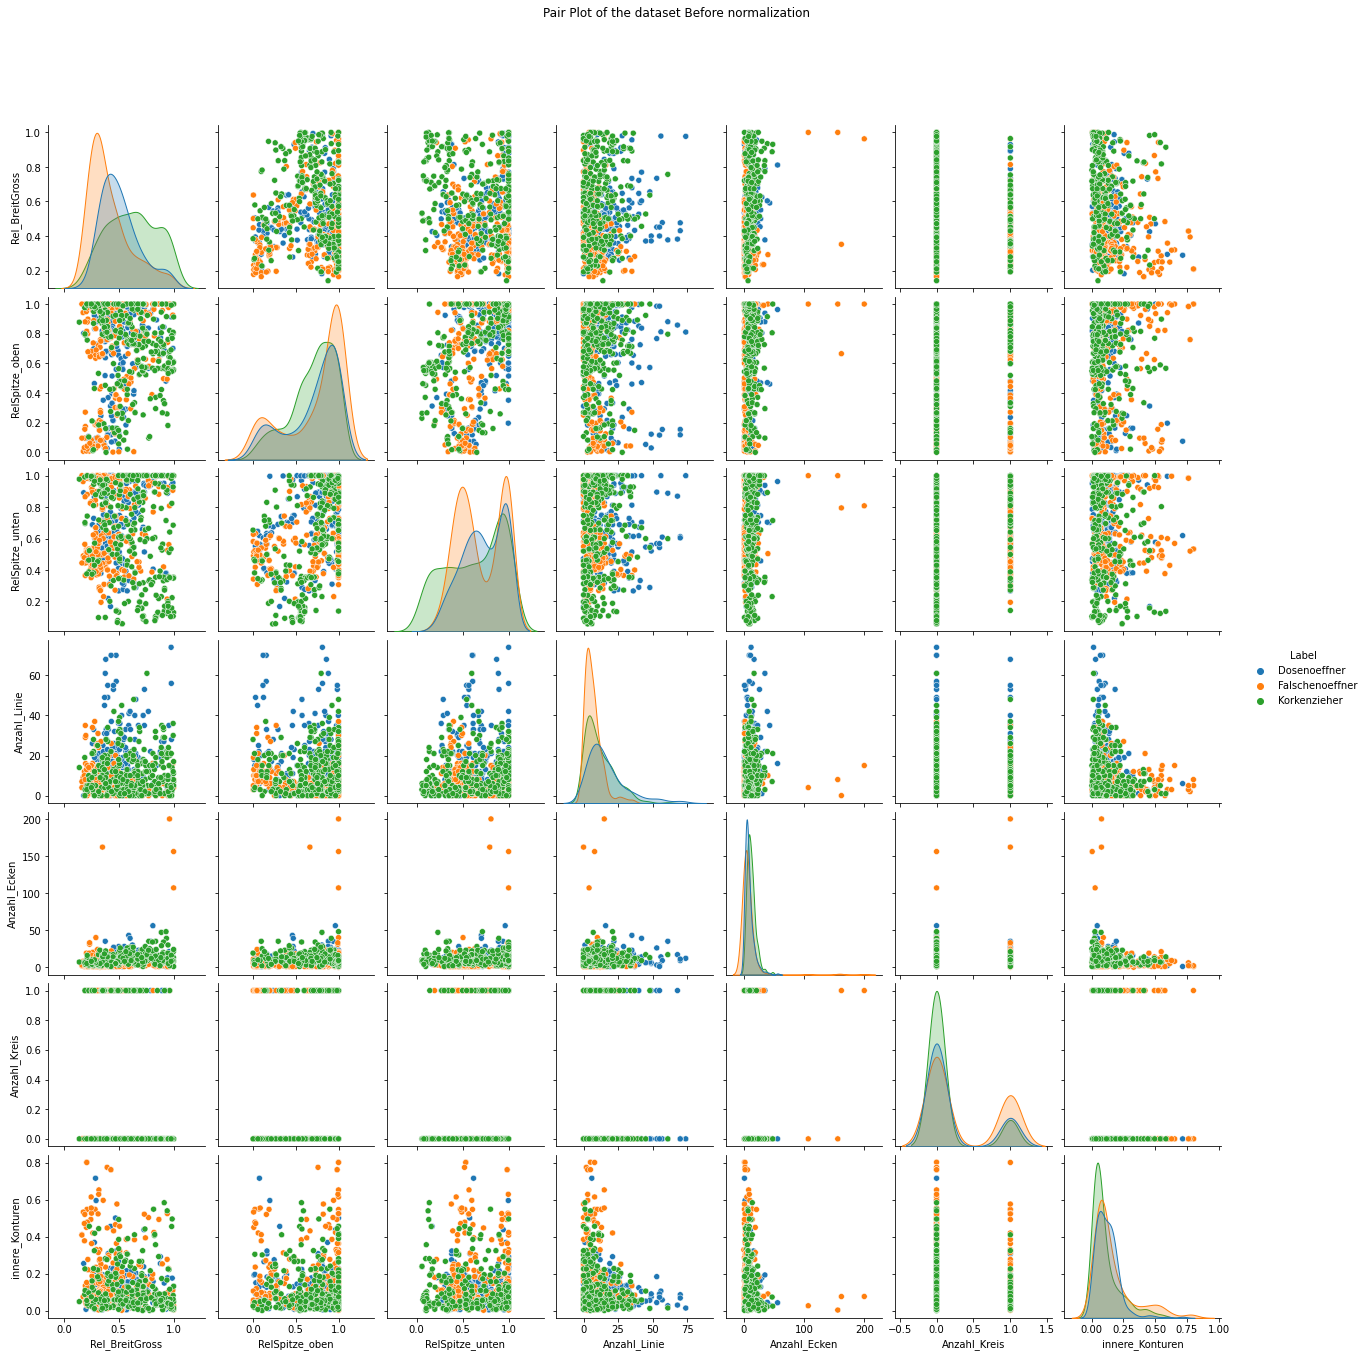

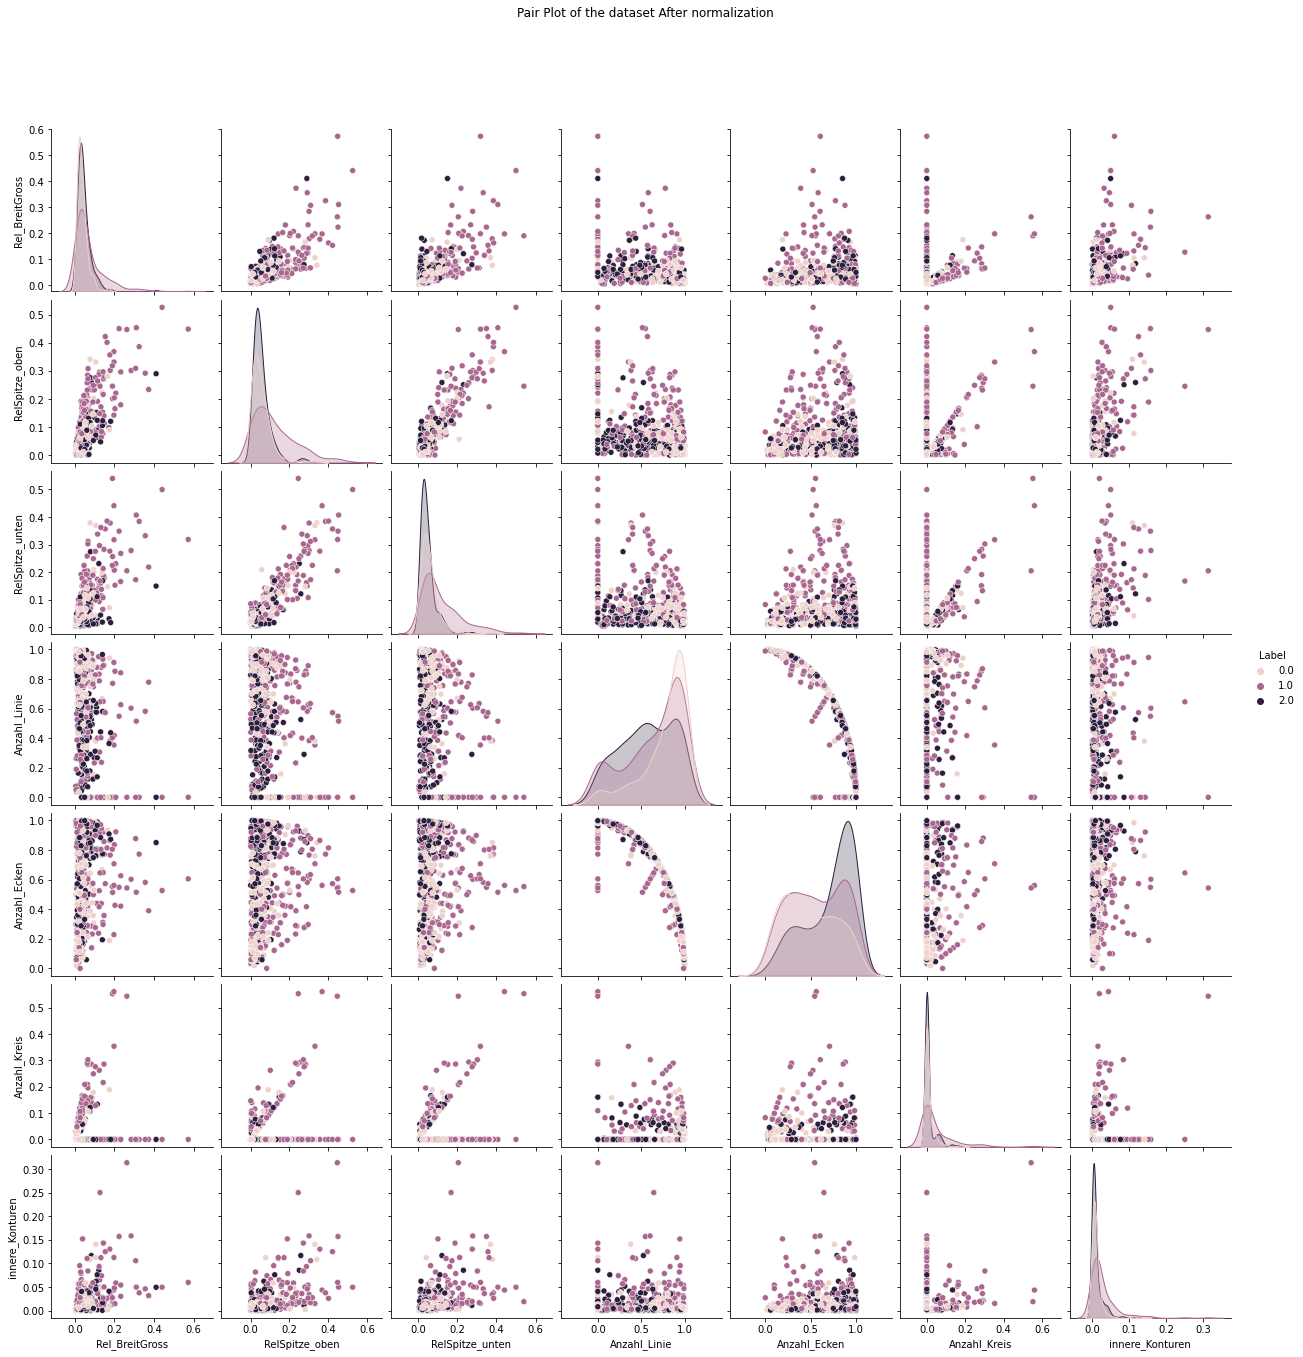

In [33]:
## Before
# View the relationships between variables; color code by species type
di= {0: 'Dosenoeffner', 1: 'Falschenoeffner', 2:'Korkenzieher'} # dictionary


before= sns.pairplot(df.replace({'Label': di}), hue= 'Label')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, train_labels],
                        columns= df.columns)
di= {0: 'Dosenoeffner', 1: 'Flaschenoeffner', 2: 'Korkenzieher'}
after= sns.pairplot(iris_df_2.replace({'Lebel':di}), hue= 'Label')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [31]:
K=5
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, np.ravel(train_labels))
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[1 0 1 0 2 0 0 2 2 0 0 2 0 0 1 0 0 1 2 0 0 2 1 0 0 2 0 0 2 2 0 2 0 0 2 0 0
 0 0 2 2 0 2 1 1 2 0 2 0 2 0 0 0 0 0 2 0 2 0 0 1 0 0 0 1 2 0 0 1 1 1 0 1 0
 0 2 1 0 1 2 0 2 0 2 1 2 0 2 1 1 1 0 0 2 1 1 0 1 1 1 2 1 1 0 2 1 0 0 2 1 2
 1 0 1 1 0 0 0 0 1 1 1 2 2 1 2 0 1 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 1 0 2
 0 1 1 1 1 2 1 1 1 1 0 1 2 2 2 1 0 0 2 0 2 1 1 2 2 2 2 2 2 2 2 1 1 2 0 0 2
 2 1 2 2 0 0 0 0 2 0 2 2 0 2 0 2 2 2 0 1 2 2 2 1 0 0 2 0 2 1 0 2 1 2 2 2 0
 2 2 2 0 2 2 0 2 0 2 0 1 2 2 0 1 1 2 2]


In [32]:
print(f'The accuracy of sklearn implementation is {accuracy_score(np.ravel(test_labels), y_pred_sklearn)}')

The accuracy of sklearn implementation is 0.5518672199170125
